<a href="https://colab.research.google.com/github/carascott/skills-introduction-to-github/blob/main/APIHomework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import json
import pandas as pd
import json
import requests

In [5]:
# 1
stock = input()

AAPL


In [6]:
print("The Stock we will research is: " + stock)

The Stock we will research is: AAPL


In [7]:
# 4
apikey = "SvSrgl8vOP48eigyRsxgN1Ua1rjgw30H8TEOx6eJ"

url = "https://yfapi.net/v6/finance/quote"

querystring = {"symbols": stock}

headers = {
    'x-api-key': apikey
}

response = requests.get(url, headers=headers, params=querystring)

if response.status_code == 200:
    stock_json = response.json()
    print(json.dumps(stock_json, indent=4))
else:
    print(f"Error: {response.status_code}, {response.text}")

{
    "quoteResponse": {
        "result": [
            {
                "language": "en-US",
                "region": "US",
                "quoteType": "EQUITY",
                "typeDisp": "Equity",
                "quoteSourceName": "Nasdaq Real Time Price",
                "triggerable": true,
                "customPriceAlertConfidence": "HIGH",
                "currency": "USD",
                "tradeable": false,
                "cryptoTradeable": false,
                "earningsTimestamp": 1722544200,
                "earningsTimestampStart": 1730372340,
                "earningsTimestampEnd": 1730721600,
                "dividendYield": 0.44,
                "epsTrailingTwelveMonths": 6.56,
                "epsForward": 7.48,
                "epsCurrentYear": 6.68,
                "priceEpsCurrentYear": 33.97605,
                "sharesOutstanding": 15204100096,
                "bookValue": 4.382,
                "fiftyDayAverage": 222.3106,
                "fiftyDayAverag

In [19]:
# 2
if response.status_code == 200:
    stock_json = response.json()
    if 'quoteResponse' in stock_json and 'result' in stock_json['quoteResponse'] and stock_json['quoteResponse']['result']:
        stock_data = stock_json['quoteResponse']['result'][0]
        print(f"Ticker Name: {stock_data.get('symbol')}")
        print(f"Full Name: {stock_data.get('longName')}")
        print(f"Current Market Price: {stock_data.get('regularMarketPrice')}")
        print(f"Target Mean Price: {stock_data.get('targetMeanPrice')}")
        print(f"52 Week High: {stock_data.get('fiftyTwoWeekHigh')}")
        print(f"52 Week Low: {stock_data.get('fiftyTwoWeekLow')}")

        trending_url = "https://yfapi.net/v11/finance/trending"
        trending_response = requests.get(trending_url, headers=headers)
        if trending_response.status_code == 200:
            trending_json = trending_response.json()
            if 'finance' in trending_json and 'result' in trending_json['finance'] and trending_json['finance']['result']:
                trending_stocks = trending_json['finance']['result'][0]['quotes'][:5]
                print("\nTop 5 Trending Stocks:")
                for stock in trending_stocks:
                    print(f"- {stock.get('symbol')}: {stock.get('shortName')}")

        else:
            print(f"Error fetching trending stocks: {trending_response.status_code}, {trending_response.text}")
    else:
        print("Stock data not found in the response.")
else:
    print(f"Error: {response.status_code}, {response.text}")

Ticker Name: AAPL
Full Name: Apple Inc.
Current Market Price: 226.96
Target Mean Price: None
52 Week High: 237.23
52 Week Low: 164.08
Error fetching trending stocks: 403, {"message":"Missing Authentication Token","hint":"Sign up for API key https://financeapi.net/tutorial"}


In [26]:
if response.status_code == 200:
    stock_json = response.json()
    if 'quoteResponse' in stock_json and 'result' in stock_json['quoteResponse'] and stock_json['quoteResponse']['result']:
        stock_data = stock_json['quoteResponse']['result'][0]
        print(f"Ticker Name: {stock_data.get('symbol')}")
        print(f"Full Name: {stock_data.get('longName')}")
        print(f"Current Market Price: {stock_data.get('regularMarketPrice')}")
        print(f"Target Mean Price: {stock_data.get('targetMeanPrice')}")
        print(f"52 Week High: {stock_data.get('fiftyTwoWeekHigh')}")
        print(f"52 Week Low: {stock_data.get('fiftyTwoWeekLow')}")

    else:
        print("Stock data not found in the response.")
else:
    print(f"Error: {response.status_code}, {response.text}")

trending_url = "https://yfapi.net/v1/finance/trending/US"

trending_response = requests.get(trending_url, headers=headers)

if trending_response.status_code == 200:
    trending_json = trending_response.json()
    if 'finance' in trending_json and 'result' in trending_json['finance'] and trending_json['finance']['result']:
        trending_stocks = trending_json['finance']['result'][0]['quotes'][:5]
        print("\nTop 5 Trending Stocks:")
        for stock in trending_stocks:
            print(f"- {stock.get('symbol')}: {stock.get('shortName')}")
    else:
        print("Trending stock data not found in the response.")
else:
    print(f"Error fetching trending stocks: {trending_response.status_code}, {trending_response.text}")

Ticker Name: AAPL
Full Name: Apple Inc.
Current Market Price: 226.775
Target Mean Price: None
52 Week High: 237.23
52 Week Low: 164.08

Top 5 Trending Stocks:
- HUM: None
- TSLA: None
- JOBY: None
- NKE: None
- CLOV: None


In [31]:
if response.status_code == 200:
    stock_json = response.json()
    if 'quoteResponse' in stock_json and 'result' in stock_json['quoteResponse'] and stock_json['quoteResponse']['result']:
        stock_data = stock_json['quoteResponse']['result'][0]
        stock_info = {
            'Ticker Name': stock_data.get('symbol'),
            'Full Name': stock_data.get('longName'),
            'Current Market Price': stock_data.get('regularMarketPrice'),
            'Target Mean Price': stock_data.get('targetMeanPrice'),
            '52 Week High': stock_data.get('fiftyTwoWeekHigh'),
            '52 Week Low': stock_data.get('fiftyTwoWeekLow')
        }

        trending_url = "https://yfapi.net/v1/finance/trending/US"
        trending_response = requests.get(trending_url, headers=headers)

        if trending_response.status_code == 200:
            trending_json = trending_response.json()
            if 'finance' in trending_json and 'result' in trending_json['finance'] and trending_json['finance']['result']:
                trending_stocks = trending_json['finance']['result'][0]['quotes'][:5]
                trending_data = []
                for stock in trending_stocks:
                    trending_data.append({
                        'Trending Ticker': stock.get('symbol'),
                        'Trending Name': stock.get('shortName')
                    })

                df = pd.DataFrame({**stock_info, **{'Trending Stocks': [trending_data]}})
                print(df)

                df.to_csv('stock_data.csv', index=False)
                print("Data saved to stock_data.csv")

            else:
                print("Trending stock data not found in the response.")
        else:
            print(f"Error fetching trending stocks: {trending_response.status_code}, {trending_response.text}")
    else:
        print("Stock data not found in the response.")
else:
    print(f"Error: {response.status_code}, {response.text}")

  Ticker Name   Full Name  Current Market Price Target Mean Price  \
0        AAPL  Apple Inc.               226.775              None   

   52 Week High  52 Week Low  \
0        237.23       164.08   

                                     Trending Stocks  
0  [{'Trending Ticker': 'HUM', 'Trending Name': N...  
Data saved to stock_data.csv


AAPL


[*********************100%***********************]  1 of 1 completed


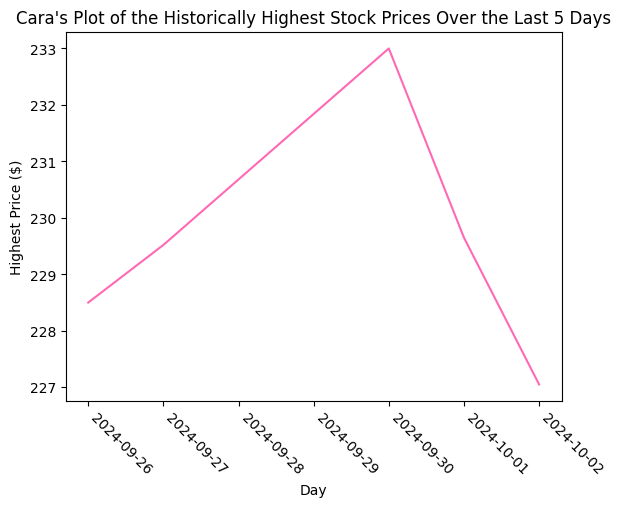

In [41]:
import matplotlib.pyplot as plt
import yfinance as yf

stock_ticker = input()

data = yf.download(stock_ticker, period="5d")

high_prices = data['High']

plt.plot(high_prices, color='hotpink')

plt.title("Cara's Plot of the Historically Highest Stock Prices Over the Last 5 Days")
plt.xlabel("Day")
plt.ylabel("Highest Price ($)")
plt.xticks(rotation=-45, ha='left')
plt.show()